In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

# 1. Description

In this competition your task is to predict __whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.__ 

To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### train.csv 
- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

+ PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

+ HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

+ CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

+ Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

+ Destination - The planet the passenger will be debarking to.

+ Age - The age of the passenger.

+ VIP - Whether the passenger has paid for special VIP service during the voyage.

+ RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has 
billed at each of the Spaceship Titanic's many luxury amenities.

+ Name - The first and last names of the passenger.

+ Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### test.csv 
- Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

### sample_submission.csv 
- A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

# 2. Data Analyzing

In [3]:
train_dataset = pd.read_csv("train.csv")
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_dataset.shape

(8693, 14)

In [5]:
train_dataset.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
print(train_dataset.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [7]:
print(train_dataset.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [8]:
print(train_dataset["HomePlanet"].unique())
print(train_dataset.Destination.unique())
print(train_dataset.Transported.unique())
print(train_dataset.VIP.unique())


['Europa' 'Earth' 'Mars' nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[False  True]
[False True nan]


drop cabin and name 

In [9]:
train_dataset.drop(["PassengerId","Cabin","Name"],axis=1,inplace=True)



In [10]:
train_dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [11]:
# train_dataset.replace({'Europa':0, 'Earth':1, 'Mars':2},inplace=True)
# train_dataset.replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2},inplace=True)
train_dataset.Transported.replace({False:0,True:1},inplace=True)
train_dataset.CryoSleep.replace({False:0,True:1},inplace=True)
train_dataset.VIP.replace({False:0,True:1},inplace=True)


In [12]:
train_dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1


In [13]:
train_dataset.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [14]:
age_mean = train_dataset.Age.dropna().values.mean()
room_service_mean = train_dataset.RoomService.dropna().values.mean()
food_court_mean = train_dataset.FoodCourt.dropna().values.mean()
shopping_mall_mean = train_dataset.ShoppingMall.dropna().values.mean()
spa_mean = train_dataset.Spa.dropna().values.mean()
vrdeck_mean = train_dataset.VRDeck.dropna().values.mean()



In [15]:
train_dataset_dropped = train_dataset.fillna({'Age':age_mean,
                                              "RoomService":room_service_mean,
                                              "FoodCourt":food_court_mean,
                                              "ShoppingMall":shopping_mall_mean,
                                              "Spa" :spa_mean,
                                              "VRDeck":vrdeck_mean  
                                                })

                      

In [16]:
train_dataset_dropped.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [17]:
train_dataset_dropped_double = train_dataset_dropped.dropna()
print(train_dataset_dropped_double.isnull().sum())
print(train_dataset_dropped_double.isna().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [18]:
train_dataset_dropped_double.shape

(7913, 11)

In [19]:
train_dataset_dropped_double.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [20]:
train_dataset_dropped_double = pd.get_dummies(train_dataset_dropped_double,["HomePlanet","Destination"])

print(train_dataset_dropped_double.shape)

(7913, 15)


In [21]:
def csv_preprocessing(csv_name:str)->pd.DataFrame:
    dataset = pd.read_csv(csv_name)

    dataset.drop(["PassengerId","Cabin","Name"],axis=1,inplace=True)

    dataset.Transported.replace({False:0,True:1},inplace=True)
    dataset.CryoSleep.replace({False:0,True:1},inplace=True)
    dataset.VIP.replace({False:0,True:1},inplace=True)

    age_mean = dataset.Age.dropna().values.mean()
    room_service_mean = dataset.RoomService.dropna().values.mean()
    food_court_mean = dataset.FoodCourt.dropna().values.mean()
    shopping_mall_mean = dataset.ShoppingMall.dropna().values.mean()
    spa_mean = dataset.Spa.dropna().values.mean()
    vrdeck_mean = dataset.VRDeck.dropna().values.mean()

    
    dataset_dropped = dataset.fillna({'Age':age_mean,
                                              "RoomService":room_service_mean,
                                              "FoodCourt":food_court_mean,
                                              "ShoppingMall":shopping_mall_mean,
                                              "Spa" :spa_mean,
                                              "VRDeck":vrdeck_mean  
                                                })
    
    train_dataset_dropped_dummies= dataset_dropped.dropna()
    # train_dataset_dropped_dummies = pd.get_dummies(train_dataset_dropped,["HomePlanet","Destination"])
    # train_dataset_dropped_dummies.dropna(inplace=True)

    X = train_dataset_dropped_dummies.drop("Transported",axis=1).values
    
    y =  train_dataset_dropped_dummies["Transported"].values
    train_dataset_dropped_dummies.drop("Transported",axis=1,inplace=True)

    train_dataset_dropped_dummies.insert(loc=len(train_dataset_dropped_dummies.columns),column="Transported",value=y)
    return X,y,train_dataset_dropped_dummies

                      
    
    


In [22]:
X,y,dataframe = csv_preprocessing("train.csv")
print(X[1:])
print(y.shape)

[['Earth' 0.0 'TRAPPIST-1e' ... 25.0 549.0 44.0]
 ['Europa' 0.0 'TRAPPIST-1e' ... 0.0 6715.0 49.0]
 ['Europa' 0.0 'TRAPPIST-1e' ... 371.0 3329.0 193.0]
 ...
 ['Earth' 0.0 'TRAPPIST-1e' ... 1872.0 1.0 0.0]
 ['Europa' 0.0 '55 Cancri e' ... 0.0 353.0 3235.0]
 ['Europa' 0.0 'TRAPPIST-1e' ... 0.0 0.0 12.0]]
(7913,)


/var/folders/h3/1k8qyncd5dn7cx_3ncvl4yh40000gn/T/ipykernel_55059/2043538908.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset_dropped_dummies.drop("Transported",axis=1,inplace=True)


In [23]:
dataframe.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1


<AxesSubplot:>

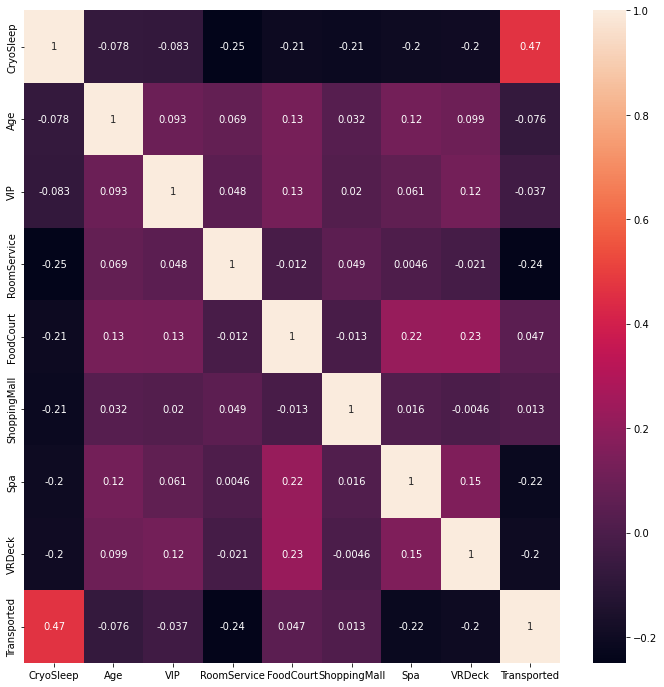

In [24]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(dataframe.corr(),annot=True)

# 2 Machine learning

In [25]:
from sklearn.preprocessing import LabelEncoder
scaler_mm = LabelEncoder().fit(X[:,0])
X[:,0] = scaler_mm.transform(X[:,0])

X[:,2] = LabelEncoder().fit_transform(X[:,2])

In [26]:
X[1,:]

array([0, 0.0, 2, 24.0, 0.0, 109.0, 9.0, 25.0, 549.0, 44.0], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=40)

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier()
svc = SVC()
lgr = LogisticRegression()
kfold = StratifiedKFold(n_splits=5)

models  = [rfc,svc,lgr]


In [29]:
scores = []
for  model in models:
    score = cross_val_score(estimator=model,X=X_train,y=y_train,cv=kfold)
    
    scores.append(score)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [30]:
scores = np.array(scores)
print(scores)
print(scores.max())
print(scores.argmax())

[[0.76224329 0.78041074 0.78278041 0.78830964 0.79304897]
 [0.76540284 0.78515008 0.80094787 0.78199052 0.7985782 ]
 [0.77251185 0.78672986 0.77409163 0.77330174 0.80963665]]
0.8096366508688784
14


In [31]:
lgr = LogisticRegression(max_iter=500)
param_dict = {"C":[0.01,0.1,1,10,100]}
grid = GridSearchCV(lgr,param_grid=param_dict,cv=kfold).fit(X_train,y_train)


In [32]:
grid.best_params_

{'C': 0.01}

In [33]:
lgr = LogisticRegression(C=0.01,max_iter=500).fit(X_train,y_train)
print(lgr.score(X_val,y_val))

0.7826910928616551


In [34]:
X_pred = pd.read_csv("test.csv")
